In [1]:
import numpy as np
import cv2 as cv

img = cv.imread('data/gulim_9.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=35,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv.imshow('detected circles',cimg)
cv.waitKey(0)
cv.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

In [ ]:
!conda install opencv2

In [2]:
!pip install opencv

  Could not find a version that satisfies the requirement opencv (from versions: )
No matching distribution found for opencv
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import os, shutil

base_dir = './data'

for i in range(10):
    data_dir = os.path.join(base_dir, 'number_' + str(i))
    os.mkdir(data_dir)

In [51]:
fonts = ['gulim', 'ggd', 'gs', 'smj']
fnames = [ (font +'_' + str(i) + '.png', i, font) for i in range(10) for font in fonts]

'gulim'

In [34]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2)

In [5]:
img_path = os.path.join(base_dir, fnames[3][0])

In [26]:
img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

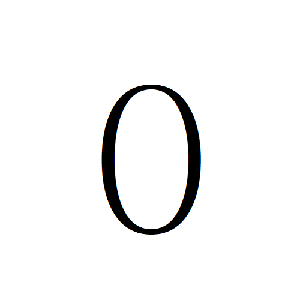

In [27]:
img

In [28]:
x

array([[[[ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         ..., 
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.]],

        [[ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         ..., 
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.]],

        [[ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         ..., 
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.]],

        ..., 
        [[ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         ..., 
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.]],

        [[ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         [ 255.,  255.,  255.],
         ..., 
         [ 255.,  255.,  255.],
       

In [37]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    cv2.imwrite('./data/number_0/' + str(i) + '.png', batch[0])
    i += 1
    if i % 100 == 0:
        break


In [58]:
labels = {i : 0 for i in range(10)}

for fname, label, font in fnames:
    img_path = os.path.join(base_dir, fname)
    
    img = image.load_img(img_path, target_size=(300, 300))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        a = labels[label] * 100 + i

        cv2.imwrite('./data/number_'+ str(label) + '/' + str(a) + '.png', batch[0])
        i += 1
        if i % 100 == 0:
            break
    labels[label] += 1
    

In [54]:
labels

{'ggd': 10, 'gs': 10, 'gulim': 10, 'smj': 10}